<a href="https://colab.research.google.com/github/vivandsouza/TSAI/blob/master/Fourth_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


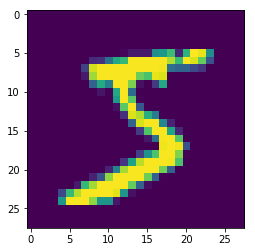

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 20)        1820      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 20)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 20)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.1501 - acc: 0.9545
Epoch 2/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0479 - acc: 0.9851
Epoch 3/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0363 - acc: 0.9885
Epoch 4/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0308 - acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 20s 331us/step - loss: 0.0257 - acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.0240 - acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.0213 - acc: 0.9932
Epoch 8/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0182 - acc: 0.9938
Epoch 9/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0180 - acc: 0.9942
Epoch 10/10
60000/60000 [==============================] - 19s 320us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03364868897827382, 0.9907]


In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Epoch 1/20
  576/60000 [..............................] - ETA: 18s - loss: 0.0081 - acc: 0.9965

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 19s 323us/step - loss: 0.0146 - acc: 0.9955
Epoch 2/20
60000/60000 [==============================] - 19s 317us/step - loss: 0.0129 - acc: 0.9959
Epoch 3/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.0125 - acc: 0.9959
Epoch 4/20
60000/60000 [==============================] - 20s 328us/step - loss: 0.0113 - acc: 0.9960
Epoch 5/20
60000/60000 [==============================] - 19s 315us/step - loss: 0.0091 - acc: 0.9968
Epoch 6/20
60000/60000 [==============================] - 19s 315us/step - loss: 0.0097 - acc: 0.9968
Epoch 7/20
60000/60000 [==============================] - 19s 314us/step - loss: 0.0103 - acc: 0.9967
Epoch 8/20
60000/60000 [==============================] - 20s 337us/step - loss: 0.0085 - acc: 0.9972
Epoch 9/20
60000/60000 [==============================] - 19s 313us/step - loss: 0.0084 - acc: 0.9971
Epoch 10/20
60000/60000 [==============================] - 19s 314us/step - loss: 0.0075 - ac

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[3.84649001e-21 8.63031536e-15 6.26260502e-12 1.85856734e-12
  1.92231718e-20 1.90994146e-21 5.83217809e-28 1.00000000e+00
  1.49259804e-19 1.86125783e-14]
 [9.13322976e-12 4.45818417e-11 1.00000000e+00 1.19630072e-14
  1.39971467e-17 4.16822999e-20 5.66811463e-13 1.48031040e-19
  1.38026851e-13 3.98740993e-20]
 [1.78177324e-13 1.00000000e+00 4.47189130e-09 9.27411088e-14
  3.79943093e-13 8.46341920e-12 6.45014684e-12 1.54990687e-10
  4.19748125e-11 6.22639080e-14]
 [9.99999404e-01 4.87769175e-19 3.69933858e-12 5.13436009e-15
  2.69682941e-14 1.44381937e-11 6.15154022e-07 7.49116786e-15
  1.33476834e-13 1.66190119e-08]
 [4.12804154e-18 5.11433127e-13 5.04235372e-17 2.11066763e-17
  9.99999881e-01 5.81732646e-16 5.51887536e-14 5.02288803e-13
  2.22247706e-14 9.98330592e-08]
 [2.03718010e-12 1.00000000e+00 1.47731050e-10 1.38580678e-15
  1.50692982e-11 1.95202927e-14 7.06911065e-14 1.37192480e-09
  4.34363439e-12 1.51355355e-13]
 [1.17488968e-31 7.39054380e-13 2.34247306e-16 5.04676249e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored